The data used is from Housing Prices Competition for Kaggle Learn Users.

**This project is solely devoted to investigating the data (house pricing in Melbourne), dealing with categorical variables, missing values and evaluating the data using different ML algorithms. **

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/train.csv', index_col='Id') 
X_test = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [2]:
#explore 10 first rows of data
print(X_train.head(10))

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
619           20       RL         90.0    11694   Pave   NaN      Reg   
871           20       RL         60.0     6600   Pave   NaN      Reg   
93            30       RL         80.0    13360   Pave  Grvl      IR1   
818           20       RL          NaN    13265   Pave   NaN      IR1   
303           20       RL        118.0    13704   Pave   NaN      IR1   
1455          20       FV         62.0     7500   Pave  Pave      Reg   
41            20       RL         84.0     8658   Pave   NaN      Reg   
960          160       FV         24.0     2572   Pave   NaN      Reg   
76           180       RM         21.0     1596   Pave   NaN      Reg   
1390          50       RM         60.0     6000   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
Id                                    ...   

In [3]:
#Now let's look at the statistics
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,45.571918,...,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349
std,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,156.229962,...,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,...,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,...,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Well, it seems the data has numerical as well as categorical data. And, probably, some missing data too. Let's look to be completely sure

In [4]:
# at first look at the missing values in the data
cols_with_missing= [col for col in X.columns if X[col].isnull().any()] 
print(cols_with_missing)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
#and how many of columns that have missing values are categorical 
s = (X[cols_with_missing ].dtypes == 'object')
object_cols = list(s[s].index)
print(s)

LotFrontage     False
Alley            True
MasVnrType       True
MasVnrArea      False
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinType2     True
Electrical       True
FireplaceQu      True
GarageType       True
GarageYrBlt     False
GarageFinish     True
GarageQual       True
GarageCond       True
PoolQC           True
Fence            True
MiscFeature      True
dtype: bool


Now we have to deal with missing values first. Let's make custom class to deal with numeric as well as categirical missing values

In [6]:

import numpy as np

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('object') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [7]:
#Now transform our data
trans = DataFrameImputer()
X_train_im = trans.fit_transform(X_train)
X_valid_im = trans.transform(X_valid)
X_test_im = trans.fit_transform(X_test)

In [8]:
#Check if everything works great
print([col for col in X_train_im.columns if X_train_im[col].isnull().any()])

[]


Now it's time to deat with categorical variables - I'll be using One-hot encoder for this step. Firstly, we need to check cardinality of columns. Only columns with cardinality less than 10 will be one-hot encoded(to prevent data becoming large volume)/ Other columns will be dropped from the dataset

In [9]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train_im[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])# sort by object_nunique

[('Alley', 2),
 ('GarageFinish', 3),
 ('PoolQC', 3),
 ('MiscFeature', 3),
 ('MasVnrType', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('Fence', 4),
 ('Electrical', 5),
 ('FireplaceQu', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('GarageType', 6)]

In [10]:
# Columns that will be one-hot encoded
object_cols = [col for col in X_train_im.columns if X_train_im[col].dtype == "object"]
low_cardinality_cols = [col for col in object_cols if X_train_im[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior1st', 'Exterior2nd', 'Neighborhood']


In [11]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_im[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid_im[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_im[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train_im.index
OH_cols_valid.index = X_valid_im.index
OH_cols_test.index = X_test_im.index


# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train_im.drop(object_cols, axis=1)
num_X_valid = X_valid_im.drop(object_cols, axis=1)
num_X_test = X_test_im.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

Now it is time to see the results.

In [12]:
# a function that uses MAE metric and Random Forest for training
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [13]:
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

17648.417157534244


Now we can make the same thing but using the pipelines to shorten the code.

In [14]:
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train_new = X_train[my_cols].copy()
X_valid_new = X_valid[my_cols].copy()

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17553.371061643833


And a little more tuning. Let's see how cross-validation can improve our score:

In [16]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [17755.50479452 17280.07143836 18014.31705479 16097.28071918
 19276.7690411 ]
Average MAE score (across experiments):
17684.78860958904


The average MAE score became better. Maybe we can additionally check if RF parameters can improve it too

In [17]:
def get_score(n_estimators,preprocessor):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [18]:
results = {}
for i in range(1,9):
    results[i*50]=get_score(i*50,preprocessor)
 

In [19]:
print(results)   

{50: 18057.953678832077, 100: 18132.239140182468, 150: 17991.024749757995, 200: 17979.603878206482, 250: 17952.22268798923, 300: 17943.927657165874, 350: 17949.456442966875, 400: 17931.235367324793}


Plot the result to see if we need to change RF estimators parameter

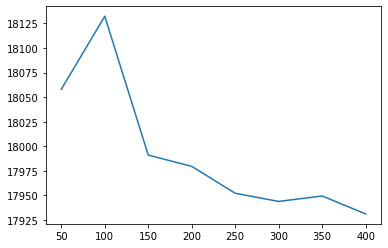

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [21]:
preds_test = my_pipeline.predict(X_test)

---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161289) to chat with other Learners.*